In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [67]:
df = pd.read_csv("/Applications/Gursimran/Projects/Salary-Analysis/Data/jobs_in_data.csv")

In [68]:
#checking the top dataset
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [69]:
#checking the bottom
df.tail()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S
9354,2020,Business Data Analyst,Data Analysis,USD,100000,100000,United States,Entry-level,Contract,Remote,United States,L


In [70]:
#checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [71]:
# checking for missing values
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [72]:
#checking duplicate
df.duplicated().sum()

4014

In [73]:
#descriptive statistics for numerical columns
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


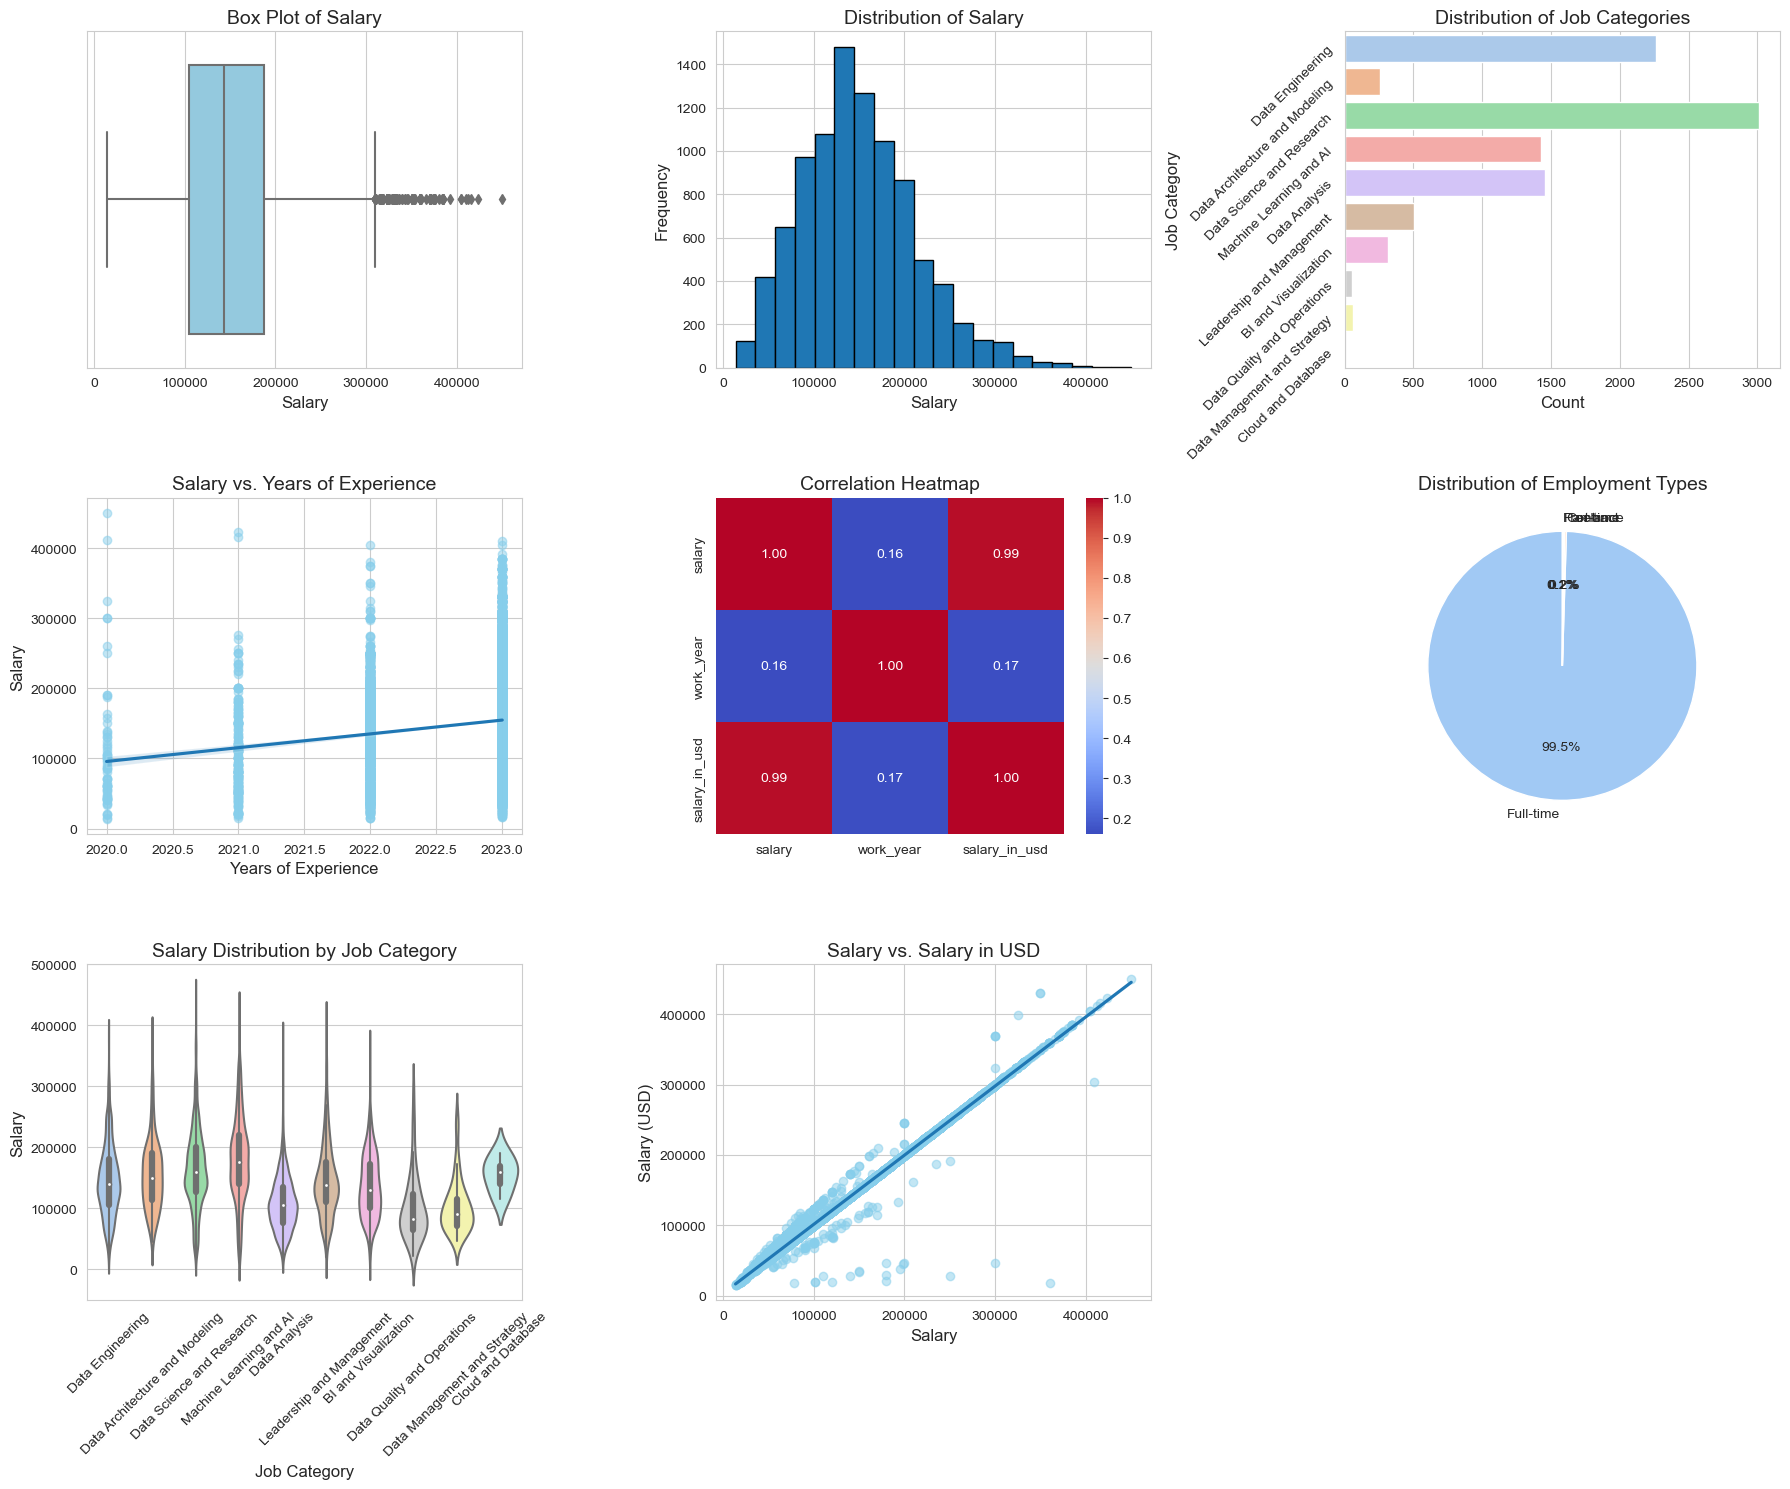

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create a figure and axes for subplots with specified size and layout
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Plot 1: Box plot of salary with customized color palette
sns.boxplot(x=df['salary'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_xlabel('Salary', fontsize=12)
axes[0, 0].set_title('Box Plot of Salary', fontsize=14)

# Plot 2: Histogram of salary with customized bins and edge color
axes[0, 1].hist(df['salary'], bins=20, edgecolor='black')
axes[0, 1].set_xlabel('Salary', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Distribution of Salary', fontsize=14)

# Plot 3: Bar plot of job categories with horizontal orientation and rotation of x-axis labels
sns.countplot(y='job_category', data=df, ax=axes[0, 2], palette='pastel')
axes[0, 2].set_xlabel('Count', fontsize=12)
axes[0, 2].set_ylabel('Job Category', fontsize=12)
axes[0, 2].set_title('Distribution of Job Categories', fontsize=14)
axes[0, 2].tick_params(axis='y', labelrotation=45)

# Plot 4: Scatter plot of salary vs. years of experience with regression line and markers
sns.regplot(x='work_year', y='salary', data=df, ax=axes[1, 0], scatter_kws={'color': 'skyblue', 'alpha': 0.5})
axes[1, 0].set_xlabel('Years of Experience', fontsize=12)
axes[1, 0].set_ylabel('Salary', fontsize=12)
axes[1, 0].set_title('Salary vs. Years of Experience', fontsize=14)

# Plot 5: Heatmap of correlations between numerical variables
corr_matrix = df[['salary', 'work_year', 'salary_in_usd']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap', fontsize=14)

# Plot 6: Pie chart of employment types
employment_counts = df['employment_type'].value_counts()
axes[1, 2].pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1, 2].set_title('Distribution of Employment Types', fontsize=14)

# Plot 7: Violin plot of salary by job category
sns.violinplot(x='job_category', y='salary', data=df, ax=axes[2, 0], palette='pastel')
axes[2, 0].set_xlabel('Job Category', fontsize=12)
axes[2, 0].set_ylabel('Salary', fontsize=12)
axes[2, 0].set_title('Salary Distribution by Job Category', fontsize=14)
axes[2, 0].tick_params(axis='x', labelrotation=45)

# Plot 8: Regression plot of salary vs. salary_in_usd
sns.regplot(x='salary', y='salary_in_usd', data=df, ax=axes[2, 1], scatter_kws={'color': 'skyblue', 'alpha': 0.5})
axes[2, 1].set_xlabel('Salary', fontsize=12)
axes[2, 1].set_ylabel('Salary (USD)', fontsize=12)
axes[2, 1].set_title('Salary vs. Salary in USD', fontsize=14)

# Remove empty subplot
fig.delaxes(axes[2, 2])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure as a high-quality image
plt.savefig('deep_analysis_plots_with_regression.png', dpi=300, bbox_inches='tight')

# Show the plots
plt.show()


Identified outliers:
      work_year                           job_title  \
173        2023              Deep Learning Engineer   
263        2023           Machine Learning Engineer   
415        2023                         ML Engineer   
515        2023                         ML Engineer   
537        2023                  Research Scientist   
...         ...                                 ...   
9157       2020                  Research Scientist   
9287       2021            Principal Data Scientist   
9304       2020            Director of Data Science   
9348       2021  Applied Machine Learning Scientist   
9351       2020                      Data Scientist   

                   job_category salary_currency  salary  salary_in_usd  \
173     Machine Learning and AI             CAD  409500         303387   
263     Machine Learning and AI             USD  319000         319000   
415     Machine Learning and AI             USD  331640         331640   
515     Machine Learni

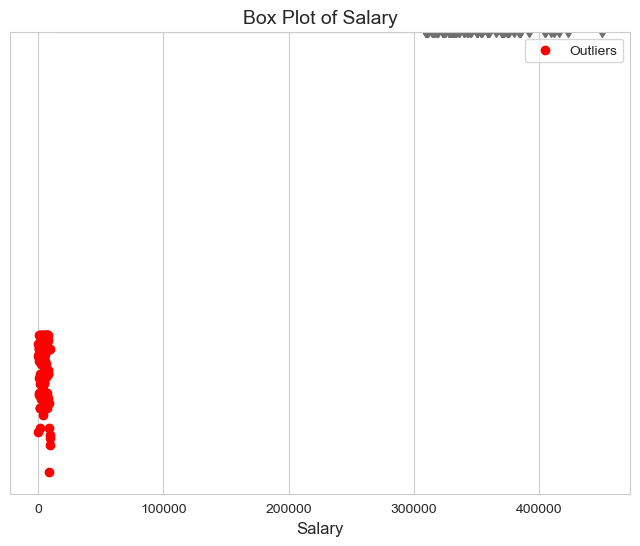

In [75]:

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Create a box plot of salary
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['salary'], color='skyblue')
plt.xlabel('Salary', fontsize=12)
plt.title('Box Plot of Salary', fontsize=14)

# Calculate the interquartile range (IQR)
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['salary'] < lower_bound) | (df['salary'] > upper_bound)]
print("Identified outliers:")
print(outliers)

# Highlight outliers on the box plot
plt.scatter(outliers.index, outliers['salary'], color='red', label='Outliers')
plt.legend()
plt.show()


In [76]:
# Train-Test Split
X = df[['work_year']]
y = df['salary']

In [77]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Step 4: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
# Step 5: Model Evaluation
# Make predictions on the training set
y_train_pred = model.predict(X_train)

In [86]:
# Evaluating the model's performance on the training set
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

In [87]:
print("Training Set Performance:")
print("Mean Squared Error (MSE):", train_mse)
print("R-squared:", train_r2)

Training Set Performance:
Mean Squared Error (MSE): 3892292951.2701306
R-squared: 0.027713030231738656


In [88]:
# Evaluate the model on testing set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [89]:
print("\nTesting Set Performance:")
print("Mean Squared Error (MSE):", test_mse)
print("R-squared:", test_r2)


Testing Set Performance:
Mean Squared Error (MSE): 4138383131.068916
R-squared: 0.01717735147455257
